In [ ]:
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,Input
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.callbacks import ModelCheckpoint


In [1]:
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import cv2
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adamax, Adam, RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint
import keras_tuner as kt


# data loading and Data Preprocessing

In [2]:
train_df_path= "/kaggle/input/brain-data/brain_data/Training"
labels=[]
filepaths=[]

folds=os.listdir(train_df_path)
for fold in folds:
    foldpath=os.path.join(train_df_path,fold)
    foldlist=os.listdir(foldpath)
    for file in foldlist:
        filepath=os.path.join(foldpath,file)
        labels.append(fold)
        filepaths.append(filepath)


label=pd.Series(labels,name="labels")
file=pd.Series(filepaths,name="filepaths")

train_df=pd.concat([file,label],axis=1)

train_df



,filepaths,labels
0,/kaggle/input/brain-data/brain_data/Training/p...,pituitary
1,/kaggle/input/brain-data/brain_data/Training/p...,pituitary
2,/kaggle/input/brain-data/brain_data/Training/p...,pituitary
3,/kaggle/input/brain-data/brain_data/Training/p...,pituitary
4,/kaggle/input/brain-data/brain_data/Training/p...,pituitary
...,...,...
5279,/kaggle/input/brain-data/brain_data/Training/g...,glioma
5280,/kaggle/input/brain-data/brain_data/Training/g...,glioma
5281,/kaggle/input/brain-data/brain_data/Training/g...,glioma
5282,/kaggle/input/brain-data/brain_data/Training/g...,glioma


In [3]:
test_df_path= "/kaggle/input/brain-data/brain_data/Testing"
labels=[]
filepaths=[]

folds=os.listdir(test_df_path)
for fold in folds:
    foldpath=os.path.join(test_df_path,fold)
    foldlist=os.listdir(foldpath)
    for file in foldlist:
        filepath=os.path.join(foldpath,file)

        labels.append(fold)
        filepaths.append(filepath)

label=pd.Series(labels,name="labels")
file=pd.Series(filepaths,name="filepaths")

test_df=pd.concat([file,label],axis=1)
test_df


,filepaths,labels
0,/kaggle/input/brain-data/brain_data/Testing/pi...,pituitary
1,/kaggle/input/brain-data/brain_data/Testing/pi...,pituitary
2,/kaggle/input/brain-data/brain_data/Testing/pi...,pituitary
3,/kaggle/input/brain-data/brain_data/Testing/pi...,pituitary
4,/kaggle/input/brain-data/brain_data/Testing/pi...,pituitary
...,...,...
1306,/kaggle/input/brain-data/brain_data/Testing/gl...,glioma
1307,/kaggle/input/brain-data/brain_data/Testing/gl...,glioma
1308,/kaggle/input/brain-data/brain_data/Testing/gl...,glioma
1309,/kaggle/input/brain-data/brain_data/Testing/gl...,glioma


# Split the Data 


In [4]:
valid_df,tst_df=train_test_split(test_df,test_size=0.5,random_state=42,stratify=test_df["labels"])
print(f"ts_df shape: {test_df.shape}")
print(f"valid data shape: {valid_df.shape}")
print(f"test data shape: {tst_df.shape}")

ts_df shape: (1311, 2)
valid data shape: (655, 2)
test data shape: (656, 2)


In [ ]:
img_size = (224, 224)

train = ImageDataGenerator()

test = ImageDataGenerator()

train_gen = train.flow_from_dataframe(train_df, x_col="filepaths", y_col="labels",
                                      target_size=img_size, batch_size=16, shuffle=True,
                                      class_mode='categorical', color_mode="rgb")

valid_gen = test.flow_from_dataframe(valid_df, x_col='filepaths', y_col='labels',
                                     target_size=img_size, class_mode="categorical", 
                                     color_mode="rgb", shuffle=True, batch_size=16)

test_gen = test.flow_from_dataframe(tst_df, x_col='filepaths', y_col='labels',
                                    target_size=img_size, batch_size=16, shuffle=False,
                                    color_mode="rgb", class_mode="categorical")

Found 5284 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


In [6]:
valid_df

,filepaths,labels
537,/kaggle/input/brain-data/brain_data/Testing/no...,notumor
734,/kaggle/input/brain-data/brain_data/Testing/me...,meningioma
470,/kaggle/input/brain-data/brain_data/Testing/no...,notumor
1169,/kaggle/input/brain-data/brain_data/Testing/gl...,glioma
996,/kaggle/input/brain-data/brain_data/Testing/me...,meningioma
...,...,...
882,/kaggle/input/brain-data/brain_data/Testing/me...,meningioma
1138,/kaggle/input/brain-data/brain_data/Testing/gl...,glioma
1120,/kaggle/input/brain-data/brain_data/Testing/gl...,glioma
458,/kaggle/input/brain-data/brain_data/Testing/no...,notumor


# Analysis and Visualization 


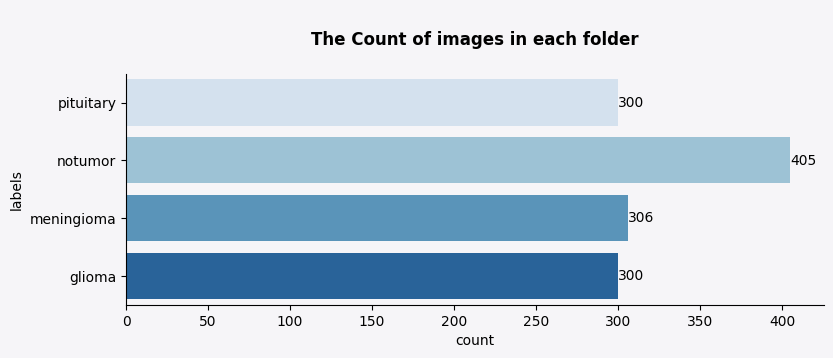

In [7]:
fig,ax=plt.subplots(figsize=(9,3))
fig.patch.set_facecolor("#f6f5f8")
ax.set_facecolor("#f6f5f8")
for i in ["right","top"]:
    ax.spines[i].set_visible(False)

i=sns.countplot(data=test_df,y=test_df["labels"],palette='Blues')
for container in i.containers:
    i.bar_label(container)

plt.title("\nThe Count of images in each folder\n",weight="bold");

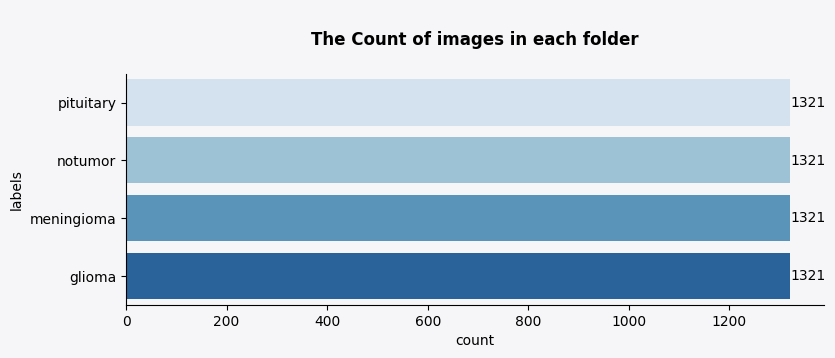

In [8]:
fig,ax=plt.subplots(figsize=(9,3))
fig.patch.set_facecolor("#f6f5f8")
ax.set_facecolor("#f6f5f8")
for i in ["top","right"]:
    ax.spines[i].set_visible(False)

x = sns.countplot(data=train_df, y=train_df["labels"],palette='Blues')
for container in x.containers:
    x.bar_label(container)
plt.title("\nThe Count of images in each folder\n",weight="bold");

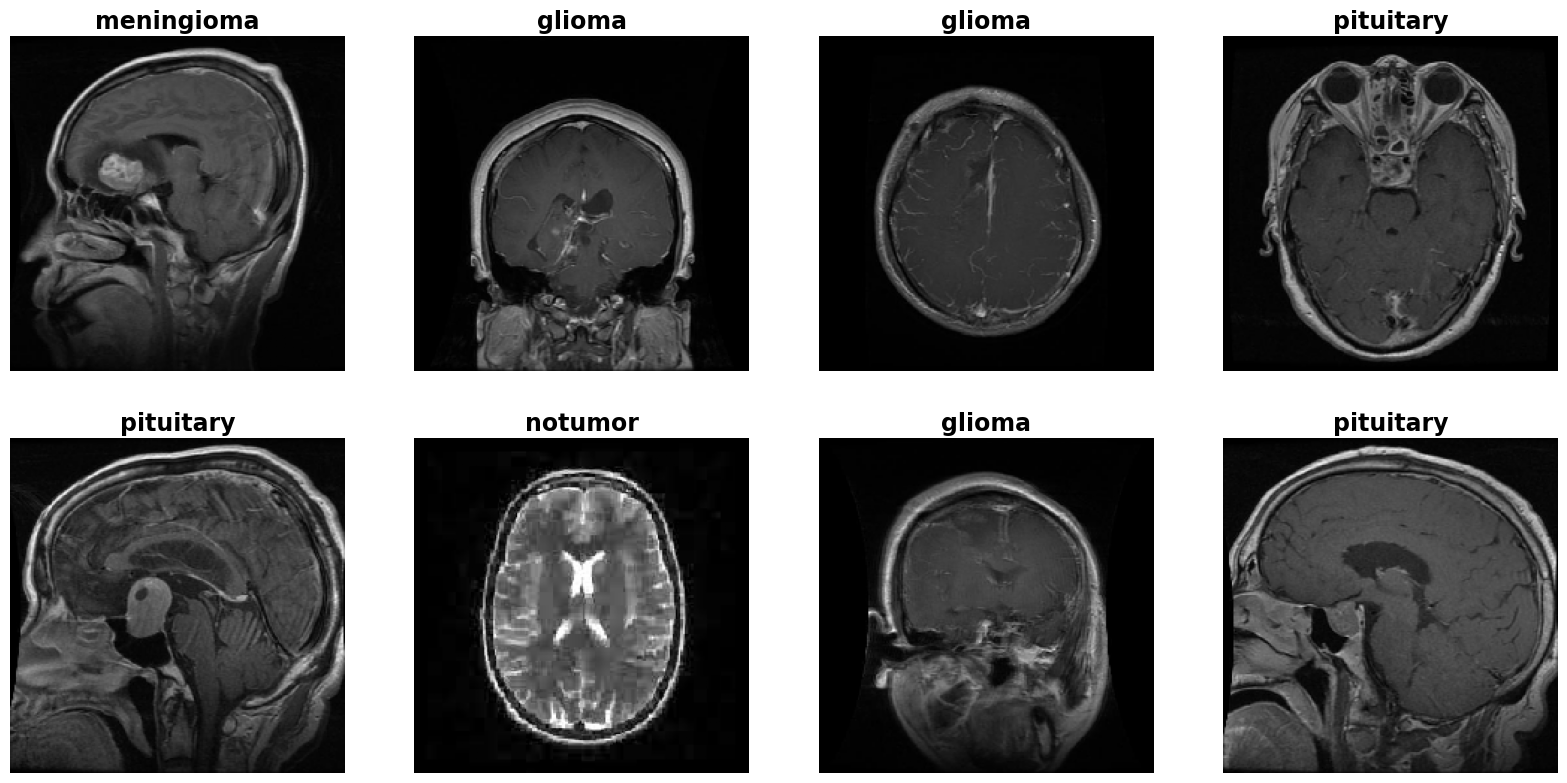

In [9]:
gen_dict = train_gen.class_indices
classes = list(gen_dict.keys())
images , labels = next(train_gen)

plt.figure(figsize= (20,20))

for i in range(8):
    plt.subplot(4,4,i+1)
    image = images[i] / 255
    plt.imshow(image)
    index = np.argmax(labels[i])
    class_name = classes[index]
    plt.title(class_name , color = 'black' , fontsize= 17,weight="bold")
    plt.axis('off')
plt.show()

# Neural network Model 


In [50]:
NNmodel = Sequential([
    Input(shape=(224,224, 3)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),

    Dense(len(classes), activation='softmax')
])

NNmodel.compile(optimizer=Adamax(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


NNmodel.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │     4,816,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,820,372 (18.39 MB)

 Trainable params: 4,820,372 (18.39 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:

history = NNmodel.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=15)


Epoch 1/15
331/331 ━━━━━━━━━━━━━━━━━━━━ 17s 45ms/step - accuracy: 0.4273 - loss: 67.0417 - val_accuracy: 0.6565 - val_loss: 4.9278
Epoch 2/15
331/331 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - accuracy: 0.6604 - loss: 5.3550 - val_accuracy: 0.4519 - val_loss: 11.9400
Epoch 3/15
331/331 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - accuracy: 0.7054 - loss: 4.1014 - val_accuracy: 0.6565 - val_loss: 6.9425
Epoch 4/15
331/331 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - accuracy: 0.7356 - loss: 2.9622 - val_accuracy: 0.5160 - val_loss: 5.1800
Epoch 5/15
331/331 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - accuracy: 0.7139 - loss: 3.4211 - val_accuracy: 0.7359 - val_loss: 2.5338
Epoch 6/15
331/331 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - accuracy: 0.7715 - loss: 1.8745 - val_accuracy: 0.7450 - val_loss: 3.3904
Epoch 7/15
331/331 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.7342 - loss: 2.5809 - val_accuracy: 0.7221 - val_loss: 2.4581
Epoch 8/15
331/331 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - accuracy: 0.7774 - loss: 1.9293 

# Evaluation Metrics (NN)


In [52]:
# Evaluate the model on the test set
test_loss, test_accuracy = NNmodel.evaluate(test_gen, verbose=1)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.7673 - loss: 2.2168
Test Accuracy: 79.57%


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


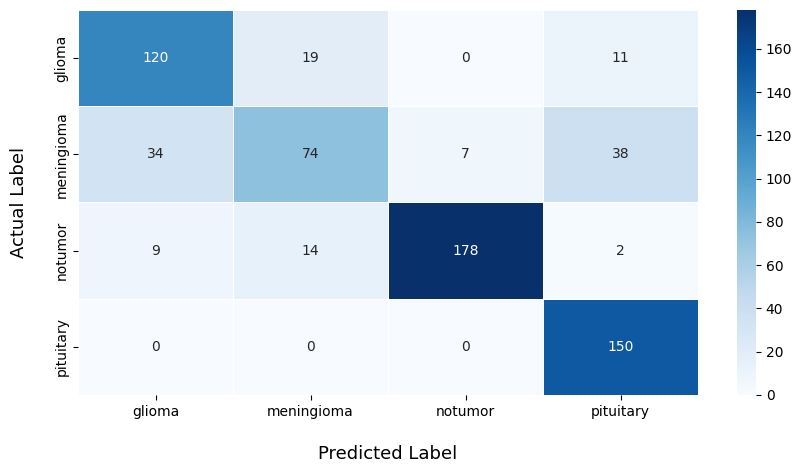

In [56]:
preds1=NNmodel.predict(test_gen)
y_pred1=np.argmax(preds1,axis=1)
y_pred1 
plt.figure(figsize=(10,5))
plt.style.use('default')
cm=confusion_matrix(test_gen.classes,y_pred1)
labels = list(test_gen.class_indices.keys())
sns.heatmap(cm,annot=True,fmt="d",xticklabels=labels,yticklabels=labels,cmap="Blues", linewidths=.5)
plt.xlabel('\nPredicted Label',fontsize=13)
plt.ylabel('Actual Label\n',fontsize=13);

In [57]:
class_report=classification_report(test_gen.classes,y_pred1)
print(class_report)

              precision    recall  f1-score   support

           0       0.74      0.80      0.77       150
           1       0.69      0.48      0.57       153
           2       0.96      0.88      0.92       203
           3       0.75      1.00      0.85       150

    accuracy                           0.80       656
   macro avg       0.78      0.79      0.78       656
weighted avg       0.80      0.80      0.79       656



# CNN Model  


In [10]:
# Create model structure
image_size = (224, 224)
channels = 3
image_shape = (image_size[0], image_size[1], channels)
class_count = 4

model =Sequential([
    Conv2D(filters=128, kernel_size=(3, 3), activation="relu", input_shape=image_shape),
    MaxPooling2D(2, 2),

    Conv2D(filters=256, kernel_size=(3, 3), activation="relu"),
    MaxPooling2D(2, 2),

    Conv2D(filters=512, kernel_size=(3, 3), activation="relu"),
    MaxPooling2D(2, 2),
    Flatten(),

    Dense(1024, activation="relu"),
    Dense(class_count, activation="softmax")
])

model.compile(optimizer=Adamax(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

checkpoint_callback = ModelCheckpoint(
    filepath="best_model.keras", 
    monitor="val_accuracy",
    save_best_only=True,
    mode="max",
    save_weights_only=False,  
    verbose=1
)




Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 256)  │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 346112)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │   354,419,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         4,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 355,902,724 (1.33 GB)

 Trainable params: 355,902,724 (1.33 GB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
history = model.fit(
    train_gen,
    epochs=10,
    validation_data=valid_gen,
    shuffle=False,
    callbacks=[checkpoint_callback]
)
model.save("final_model.h5")  


Epoch 1/10


I0000 00:00:1733695742.200238      96 service.cc:145] XLA service 0x7d239c005840 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733695742.200290      96 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1733695742.200294      96 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  1/331 ━━━━━━━━━━━━━━━━━━━━ 1:39:10 18s/step - accuracy: 0.2500 - loss: 8.6076

I0000 00:00:1733695756.987810      96 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - accuracy: 0.6783 - loss: 205.6415
Epoch 1: val_accuracy improved from -inf to 0.82901, saving model to best_model.keras
331/331 ━━━━━━━━━━━━━━━━━━━━ 104s 261ms/step - accuracy: 0.6786 - loss: 205.1463 - val_accuracy: 0.8290 - val_loss: 0.4563
Epoch 2/10
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.9276 - loss: 0.2202
Epoch 2: val_accuracy improved from 0.82901 to 0.87786, saving model to best_model.keras
331/331 ━━━━━━━━━━━━━━━━━━━━ 75s 227ms/step - accuracy: 0.9276 - loss: 0.2202 - val_accuracy: 0.8779 - val_loss: 0.3093
Epoch 3/10
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.9635 - loss: 0.1067
Epoch 3: val_accuracy improved from 0.87786 to 0.91908, saving model to best_model.keras
331/331 ━━━━━━━━━━━━━━━━━━━━ 77s 232ms/step - accuracy: 0.9635 - loss: 0.1067 - val_accuracy: 0.9191 - val_loss: 0.2217
Epoch 4/10
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.9812 - loss: 0.0621
Epoch 4: val_accuracy improved

In [12]:
train_score=model.evaluate(train_gen)
valid_score=model.evaluate(valid_gen)
test_score=model.evaluate(test_gen)

print(f"Train Loss : {train_score[0]}")
print(f"Train Accuracy : {train_score[1]}")
print(f"Validation Loss : {valid_score[0]}")
print(f"Validation Accuracy : {valid_score[1]}")
print(f"Test Loss: {test_score[0]}")
print(f"Test Accuracy: {test_score[1]}")

331/331 ━━━━━━━━━━━━━━━━━━━━ 14s 42ms/step - accuracy: 0.9994 - loss: 0.0025
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9641 - loss: 0.1234
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.9558 - loss: 0.1742
Train Loss : 0.0021049652714282274
Train Accuracy : 0.9996215105056763
Validation Loss : 0.2068597972393036
Validation Accuracy : 0.9541984796524048
Test Loss: 0.18091963231563568
Test Accuracy: 0.9634146094322205


In [13]:
# mode saving 

In [14]:
model.save('Brain Tumors.h5')


In [15]:
from sklearn.metrics import classification_report
predictions = model.predict(test_gen, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)  
true_classes = test_gen.classes  
class_labels = list(test_gen.class_indices.keys())  

print(classification_report(true_classes, predicted_classes, target_names=class_labels))

41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step
              precision    recall  f1-score   support

      glioma       0.94      0.97      0.95       150
  meningioma       0.93      0.92      0.92       153
     notumor       0.99      0.97      0.98       203
   pituitary       0.98      1.00      0.99       150

    accuracy                           0.96       656
   macro avg       0.96      0.96      0.96       656
weighted avg       0.96      0.96      0.96       656



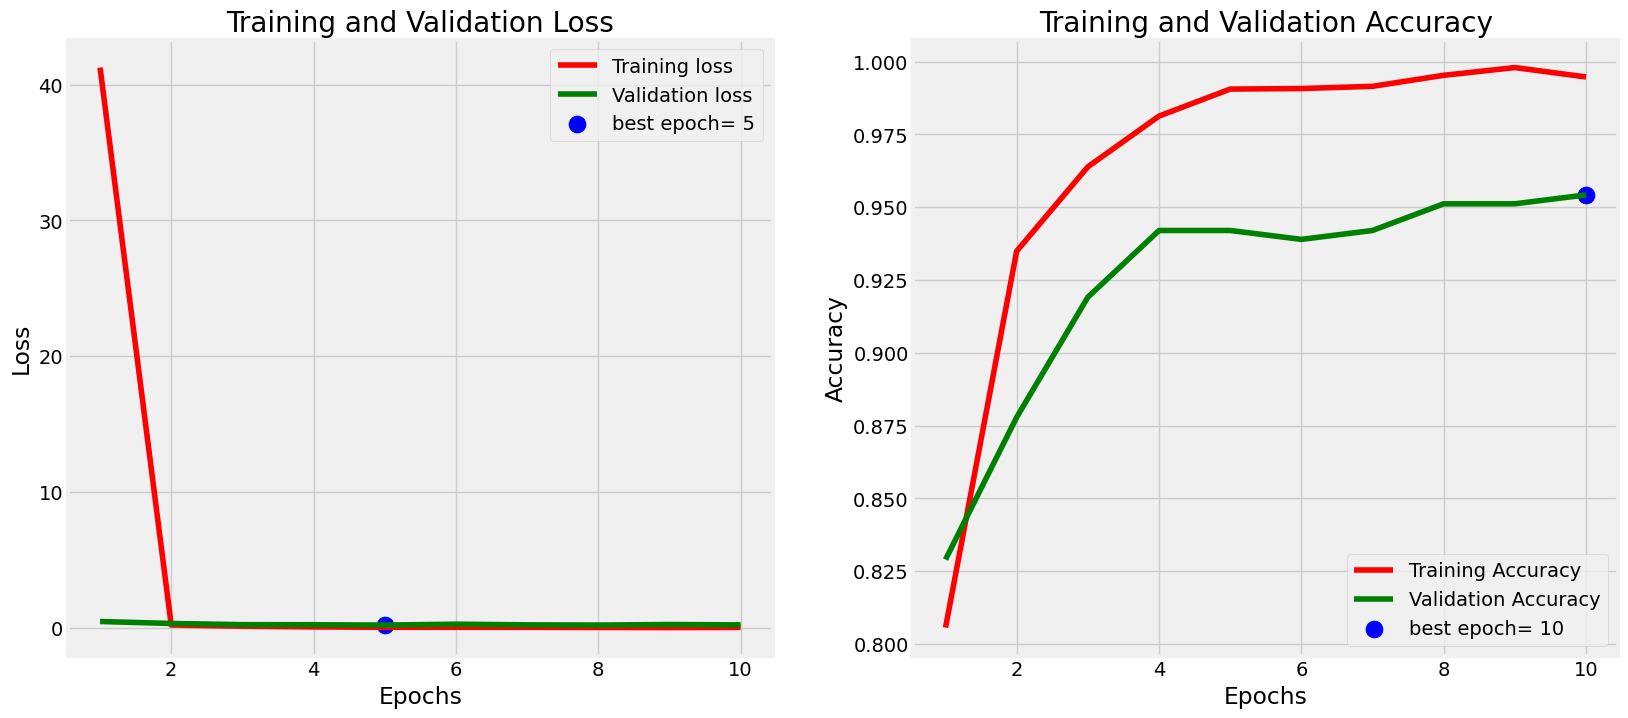

In [16]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

# Evaluation Metrics (CNN)


41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step


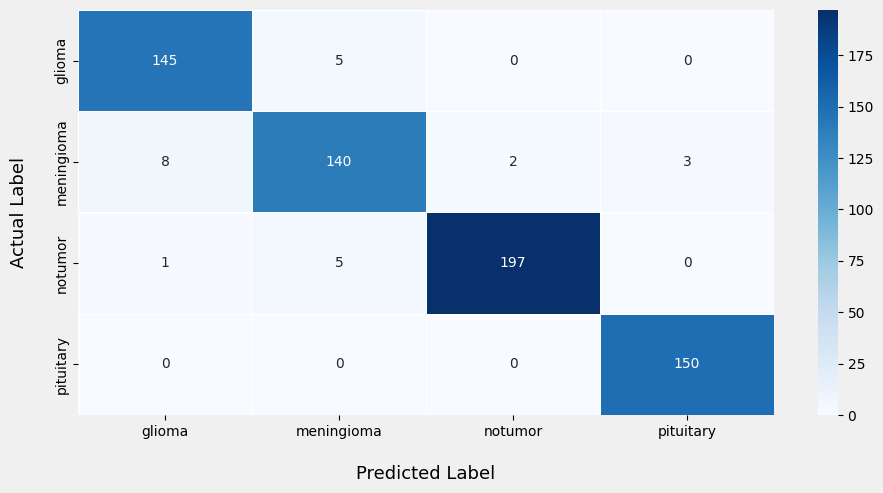

In [17]:
preds=model.predict(test_gen)
y_pred=np.argmax(preds,axis=1)
y_pred 
plt.figure(figsize=(10,5))
plt.style.use('default')
cm=confusion_matrix(test_gen.classes,y_pred)
labels = list(test_gen.class_indices.keys())
sns.heatmap(cm,annot=True,fmt="d",xticklabels=labels,yticklabels=labels,cmap="Blues", linewidths=.5)
plt.xlabel('\nPredicted Label',fontsize=13)
plt.ylabel('Actual Label\n',fontsize=13);

In [18]:
class_report=classification_report(test_gen.classes,y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       150
           1       0.93      0.92      0.92       153
           2       0.99      0.97      0.98       203
           3       0.98      1.00      0.99       150

    accuracy                           0.96       656
   macro avg       0.96      0.96      0.96       656
weighted avg       0.96      0.96      0.96       656



# Prediction 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


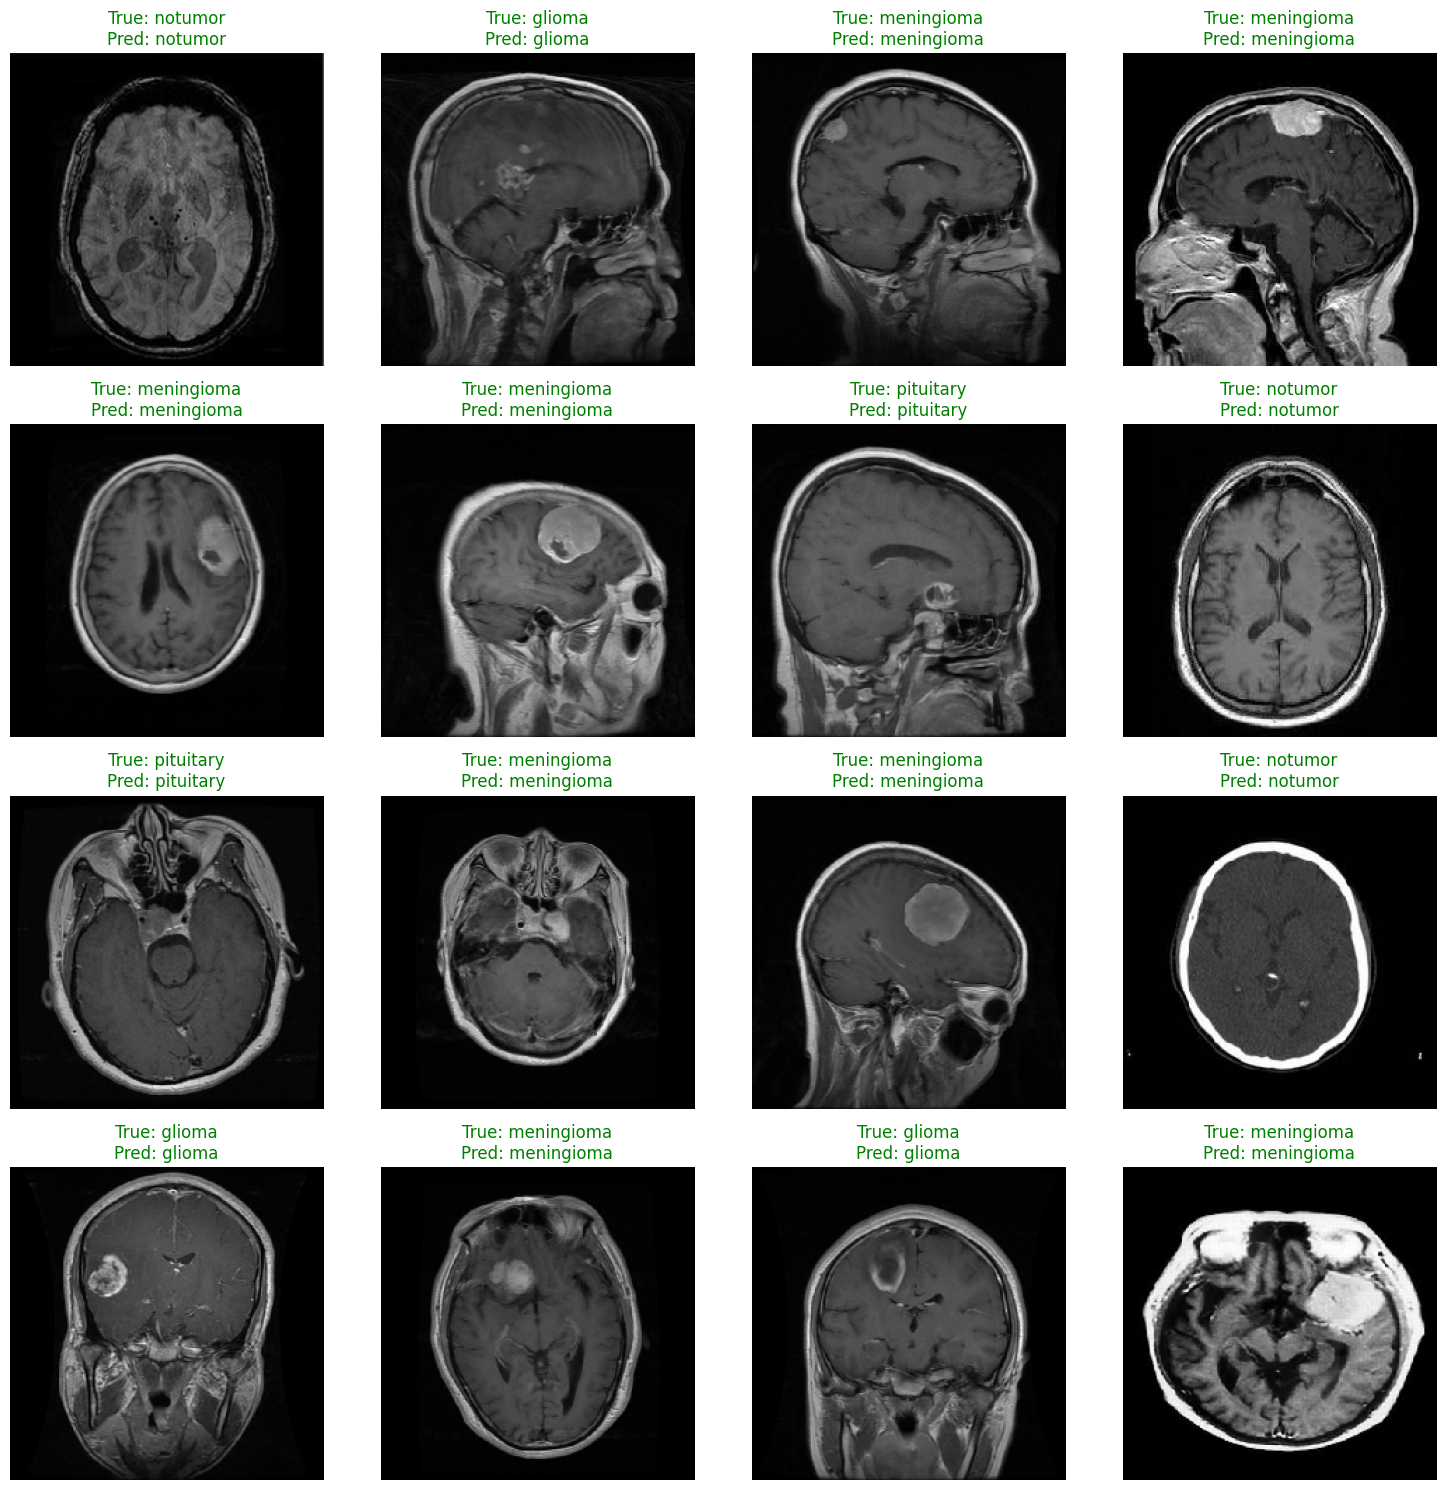

In [ ]:

images, labels = next(test_gen)

batch_predictions = model.predict(images)
predicted_indices = np.argmax(batch_predictions, axis=1)

plt.figure(figsize=(15, 15))
for i in range(len(images)):
    plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].astype("uint8"))
    true_label = class_labels[np.argmax(labels[i])]  
    predicted_label = class_labels[predicted_indices[i]]  
    color = "green" if true_label == predicted_label else "red"
    plt.title(f"True: {true_label}\nPred: {predicted_label}", color=color)
    plt.axis("off")

plt.tight_layout()
plt.show()

